In [ ]:
! poetry install

Installing dependencies from lock file

No dependencies to install or update

Installing the current project: dialogue2graph (0.1.0)


# Create dialogue2graph.Graph

`Graph` is a base class in dialogue2graph package that enables to create a directed dialog graph and work with it. You can visualise it and sample dialogs from it. 

`RecursiveDialogueSampler` is a class that helps to sample dialogs from existing dialog graphs. It uses recursion to get all possible dialogs from the graph.

In [ ]:
from dialogue2graph import Graph
from dialogue2graph.pipelines.core.dialogue_sampling import RecursiveDialogueSampler

c:\Users\anna-\Jupyter\dialog2graph\chatsky-llm-autoconfig\.venv\Lib\site-packages\pydantic\_internal\_fields.py:198: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "BaseModel"
  warnings.warn(


For experimenting with dialog graphs a set with generated data was created. It can be loaded from [HuggingFace](https://huggingface.co/datasets/DeepPavlov/d2g_generated) and contains 402 dialog graphs on various topics concerning custom support and other topics.

In [ ]:
from datasets import load_dataset

dataset = load_dataset("DeepPavlov/d2g_generated", token=True)

Here we initialize `Graph` object that represents dialogue graph.

In [ ]:
graph = Graph(graph_dict=dataset["train"][0]["graph"])

Install pygraphviz from http://pygraphviz.github.io/ .
Falling back to default layout.


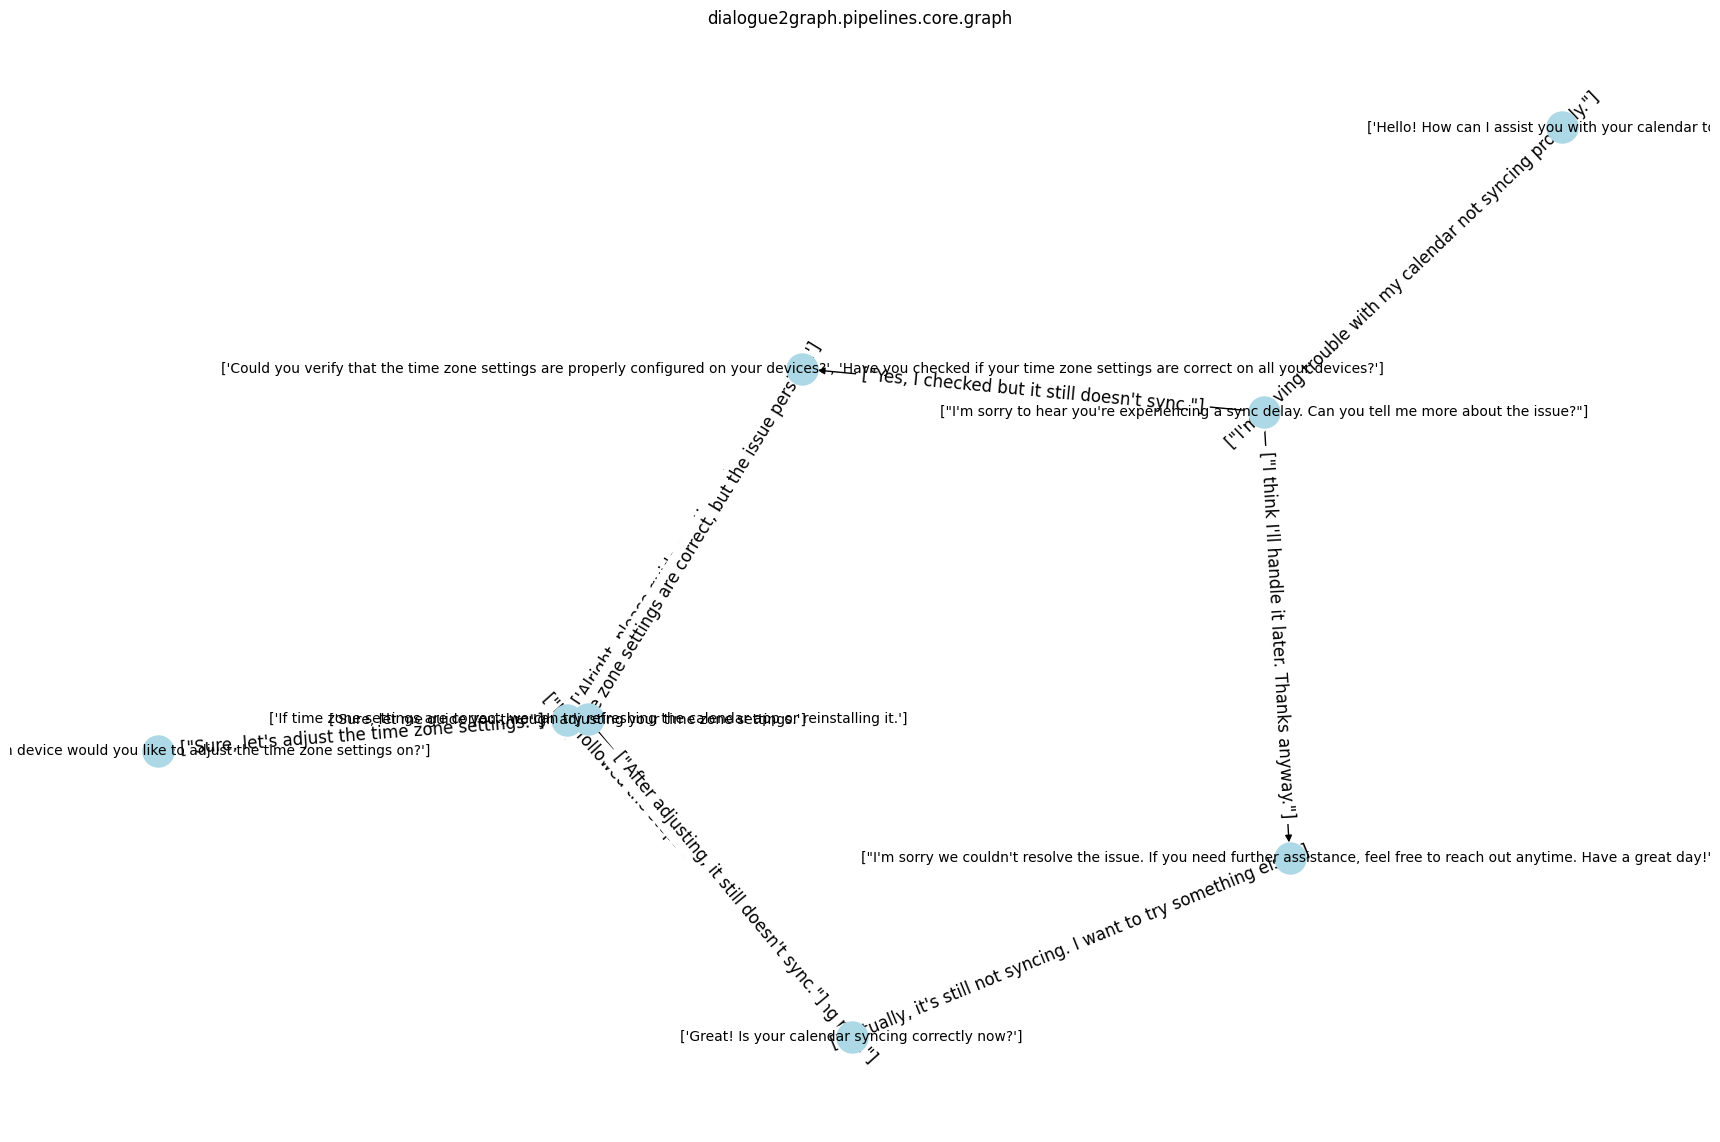

In [13]:
graph.visualise()

Using this graph we can sample dialogues that lies inside of it

In [5]:
sampler = RecursiveDialogueSampler()

In [9]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-3.5-turbo",
)
dialogues: list = sampler.invoke(graph=graph, upper_limit=10, cycle_ends_model=model)

INFO:dialogue2graph.metrics.no_llm_metrics.metrics:Graph has all the dialogues


In [10]:
print(dialogues[0])

assistant: Hello! How can I assist you with your calendar today?
user: I'm having trouble with my calendar not syncing properly.
assistant: I'm sorry to hear you're experiencing a sync delay. Can you tell me more about the issue?
user: Yes, I checked but it still doesn't sync.
assistant: Could you verify that the time zone settings are properly configured on your devices?
user: Alright, please guide me through the steps.
assistant: Sure, let me guide you through adjusting your time zone settings.
user: I want to change the time zone instead.
assistant: Of course! Which device would you like to adjust the time zone settings on?
user: Sure, let's adjust the time zone settings.
assistant: Sure, let me guide you through adjusting your time zone settings.
user: I've followed the steps and it seems to be working now.
assistant: Great! Is your calendar syncing correctly now?
user: Actually, it's still not syncing. I want to try something else.
assistant: I'm sorry we couldn't resolve the issu